##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 89 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), done.
/content
sample_data  TestImages


# **Questão 1:**

Utilizando a imagem colorida PorDoSol.tiff, implemente uma correção gama.
Utilize valores de gama acima de um e abaixo de um. Execute a correção gama nos canais R, G e B independentemente e apresente a imagem resultante. Em seguida, analise os resultados quanto aos seus efeitos qualitativos nas partes claras e escuras da imagem. Apresente também os gráficos das funções gama e os histogramas das imagens.

*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/PorDoSol/
!ls

/content/TestImages/PorDoSol
PorDoSol.tiff  RecortePorDoSol.tiff


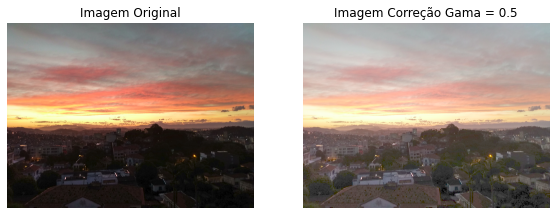

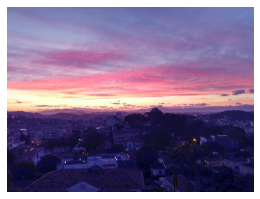

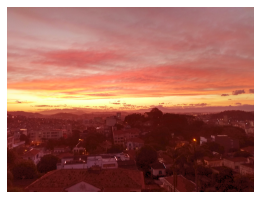

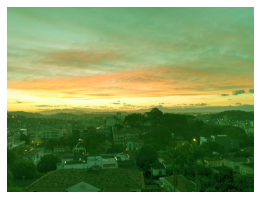

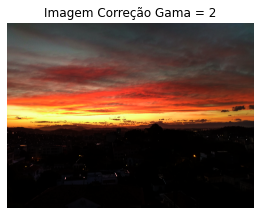

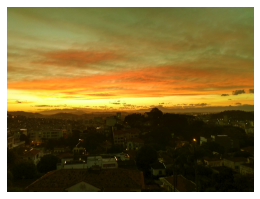

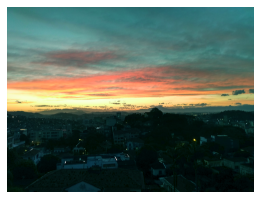

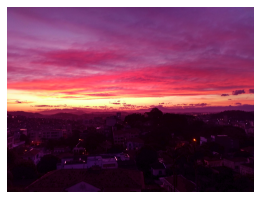

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
original = cv2.imread('PorDoSol.tiff')
plt.figure(figsize = (15,12))
plt.subplot(1,3,1)
plt.title('Imagem Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

#TRABALHANDO COM GAMA <1
gama = 1/2
gama_corrected = np.uint8(((np.float32(original)/255)**gama)*255)
#plt.figure(figsize = (15,12))
cv2.imwrite("gama_menor.tiff", gama_corrected) #salvando  imagem para gerar histograma
plt.subplot(1,3,2)
plt.title('Imagem Correção Gama = 0.5')
plt.axis('off')
plt.imshow(cv2.cvtColor(gama_corrected, cv2.COLOR_BGR2RGB))
plt.show()

#corrigindo gama na banda azul
(B, G, R) = cv2.split(original)
b05 = np.uint8(((np.float32(B)/255)**gama)*255)
corrected_gama_b05 = cv2.merge((b05, G, R))
plt.figure(figsize = (15,12))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(corrected_gama_b05, cv2.COLOR_BGR2RGB))
plt.axis('off')

#corrigindo gama na banda vermelha
(B, G, R) = cv2.split(original)
r05 = np.uint8(((np.float32(R)/255)**gama)*255)
corrected_gama_r05 = cv2.merge((B, G, r05))
plt.figure(figsize = (15,12))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(corrected_gama_r05, cv2.COLOR_BGR2RGB))
plt.axis('off')

#corrigindo gama na banda verde
(B, G, R) = cv2.split(original)
g05 = np.uint8(((np.float32(G)/255)**gama)*255)
corrected_gama_g05 = cv2.merge((B, g05, R))
plt.figure(figsize = (15,12))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(corrected_gama_g05, cv2.COLOR_BGR2RGB))
plt.axis('off')


#TRABALHANDO COM GAMA >1
gama = 2
gama_corrected2 = np.uint8(((np.float32(original)/255)**gama)*255)
plt.figure(figsize = (15,12))
cv2.imwrite("gama_maior.tiff", gama_corrected2) #salvando  imagem para gerar histograma
plt.subplot(1,3,3)
plt.title('Imagem Correção Gama = 2')
plt.axis('off')
plt.imshow(cv2.cvtColor(gama_corrected2, cv2.COLOR_BGR2RGB))
plt.show()

#corrigindo gama na banda azul
(B, G, R) = cv2.split(original)
b05 = np.uint8(((np.float32(B)/255)**gama)*255)
corrected_gama_b05 = cv2.merge((b05, G, R))
plt.figure(figsize = (15,12))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(corrected_gama_b05, cv2.COLOR_BGR2RGB))
plt.axis('off')

#corrigindo gama na banda vermelha
(B, G, R) = cv2.split(original)
r05 = np.uint8(((np.float32(R)/255)**gama)*255)
corrected_gama_r05 = cv2.merge((B, G, r05))
plt.figure(figsize = (15,12))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(corrected_gama_r05, cv2.COLOR_BGR2RGB))
plt.axis('off')

#corrigindo gama na banda verde
(B, G, R) = cv2.split(original)
g05 = np.uint8(((np.float32(G)/255)**gama)*255)
corrected_gama_g05 = cv2.merge((B, g05, R))
plt.figure(figsize = (15,12))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(corrected_gama_g05, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


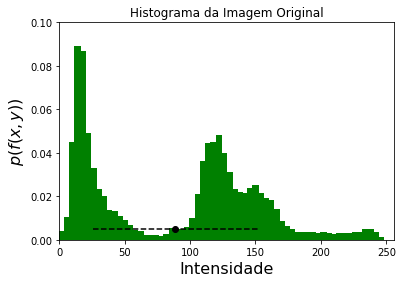

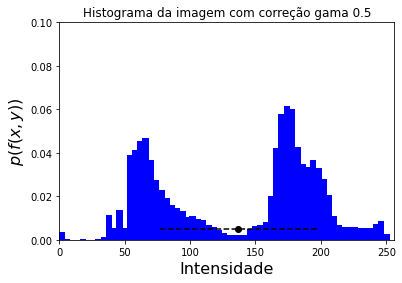

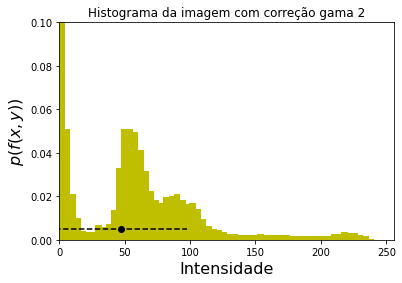

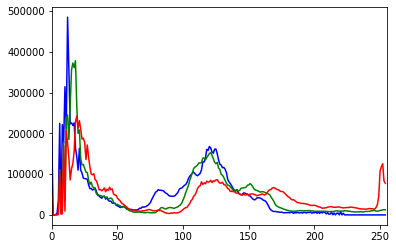

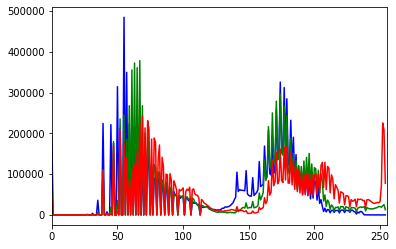

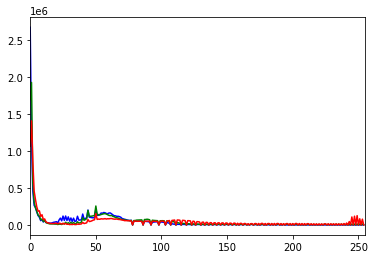

In [ ]:
import matplotlib . pyplot as plt
import numpy as np
import cv2

#histograma da imagem original
img = cv2 . imread ('PorDoSol.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt . bar ( center , hist , align =  'center', color = 'g' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt . ylabel ( '$p ( f(x , y )) $', fontsize =16)
plt . xlabel ( 'Intensidade', fontsize =16)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Histograma da Imagem Original')
plt . show ()




#histograma da imagem com correção de gama 0.5
img = cv2 . imread ('gama_menor.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt . bar ( center , hist , align =  'center', color = 'b' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt . ylabel ( '$p ( f(x , y )) $', fontsize =16)
plt . xlabel ( 'Intensidade', fontsize =16)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Histograma da imagem com correção gama 0.5')
plt . show ()

#histograma da imagem com correção de gama 2
img = cv2 . imread ('gama_maior.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt . bar ( center , hist , align =  'center', color = 'y' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt . ylabel ( '$p ( f(x , y )) $', fontsize =16)
plt . xlabel ( 'Intensidade', fontsize =16)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Histograma da imagem com correção gama 2')
plt . show ()



img0 = cv2.imread('PorDoSol.tiff')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img0],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.show()


img1 = cv2.imread('gama_menor.tiff')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.show()


img2 = cv2.imread('gama_maior.tiff')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.show()

Utilize está célula de texto para apresentar e analisar quantiitativamente e qualitativamente os resultados obtidos pelo seu programa.

Utilize uma tabela como o exemplo a seguir para apresentar os valores obtidos neste experimento.

Exemplo   | Valor do exemplo
--------- | ------
Exemplo 1 | R\$ 10
Exemplo 2 | R\$ 8
Exemplo 3 | R\$ 7
Exemplo 4 | R\$ 8

Se você julgar necessário apresentar equações utilize o Latex Math Mode. Se a ideia seja usar uma equação na mesma linha do texto, faça assim $y=ax+b$. Se vc quiser incluir uma equação em destaque é só fazer assim: $$x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

O texto no Google Colab e no Jupyter Notebook é escrito numa linguagem chamada markdown. Há alguns guias desta linguagem disponííveis na web, como por exemplo: https://docs.pipz.com/central-de-ajuda/learning-center/guia-basico-de-markdown#open

# **Questão 2:**

Dada a imagem colorida RecortePorDoSol.tiff, converta-a para tons de cinza. Peque a imagem resultante e aplique a operação de equalização de histograma. Explique esta operação detalhadamente e, em seguida, analise os resultados quanto aos seus efeitos qualitativos nas partes claras e escuras da imagem. Utilize também os gráficos dos histogramas que julgar necessário.

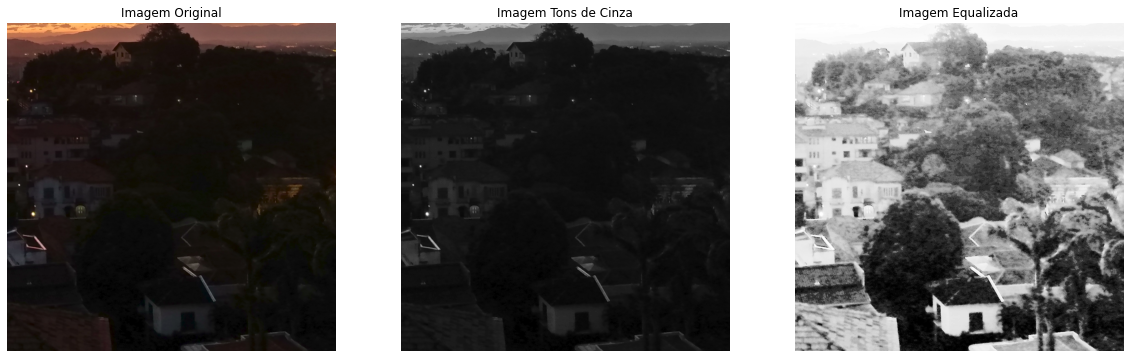

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
Original = cv2.imread('RecortePorDoSol.tiff')
grayImg = cv2.cvtColor(Original, cv2.COLOR_BGR2GRAY)
EqualizedImg = cv2.equalizeHist(grayImg)
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.title('Imagem Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(Original, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.title('Imagem Tons de Cinza')
plt.axis('off')
plt.imshow(grayImg, cmap='gray')
plt.subplot(1,3,3)
plt.title('Imagem Equalizada')
plt.axis('off')
plt.imshow(EqualizedImg,cmap='gray')

Utilize está célula de texto para apresentar e analisar quantiitativamente e qualitativamente os resultados obtidos pelo seu programa.

Utilize uma tabela como o exemplo a seguir para apresentar os valores obtidos neste experimento.

Exemplo   | Valor do exemplo
--------- | ------
Exemplo 1 | R\$ 10
Exemplo 2 | R\$ 8
Exemplo 3 | R\$ 7
Exemplo 4 | R\$ 8

Se você julgar necessário apresentar equações utilize o Latex Math Mode. Se a ideia seja usar uma equação na mesma linha do texto, faça assim $y=ax+b$. Se vc quiser incluir uma equação em destaque é só fazer assim: $$x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

O texto no Google Colab e no Jupyter Notebook é escrito numa linguagem chamada markdown. Há alguns guias desta linguagem disponííveis na web, como por exemplo: https://docs.pipz.com/central-de-ajuda/learning-center/guia-basico-de-markdown#open